In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
plt.rcParams.update({'font.size': 16})

In [2]:
datafile = '../angles_regular_graphs.json'
guarantees = json.load(open(datafile))
guarantees

{'3': {'1': {'AR': 0.6924500474008557,
   'gamma': [0.615533629093832],
   'beta': [0.3926720292447629]},
  '2': {'AR': 0.7559062918257108,
   'gamma': [0.4877097327098487, 0.8979876956225422],
   'beta': [0.5550603400685824, 0.29250781484335187]},
  '3': {'AR': 0.7923980072764281,
   'gamma': [0.4220840819023261, 0.7984127540558412, 0.9370887965673924],
   'beta': [0.608757260014991, 0.45927530900125874, 0.23539562255067184]},
  '4': {'AR': 0.8168758698205445,
   'gamma': [0.4087638451376018,
    0.7805849642303698,
    0.9877281203234828,
    1.1563136754269583],
   'beta': [0.5995654665076653,
    0.4344182507567688,
    0.29695001489559947,
    0.15906683733146543]},
  '5': {'AR': 0.8363791264990517,
   'gamma': [0.3595894069747186,
    0.7065726026028729,
    0.8225565476596165,
    1.0047548948734175,
    1.154274581864511],
   'beta': [0.6318520293950315,
    0.5226524412470716,
    0.3897420609614237,
    0.2754121638618102,
    0.1491700495831238]},
  '6': {'AR': 0.84989367453

In [13]:
guerantees3 = [guarantees[str(3)][str(q)]['AR'] for q in range(1,12)]
guerantees4 = [guarantees[str(4)][str(q)]['AR'] for q in range(1,6)]
guerantees5 = [guarantees[str(5)][str(q)]['AR'] for q in range(1,5)]

In [14]:
def get_colors(num=2, offset=0.25, cmap=plt.cm.gnuplot2):
    """
    Returns:
        Array of len ``num``.
    """
    return np.array([cmap(x) for x in np.linspace(offset, 1-offset, num)])

In [15]:
from mpl_toolkits.axes_grid1 import Divider, Size
def add_sized_axis(fig, axsize):
    # The first items are for padding and the second items are for the axes.
    # sizes are in inch.
    h = [Size.Fixed(1.0), Size.Fixed(axsize[0]), Size.Fixed(.5)]
    v = [Size.Fixed(0.7), Size.Fixed(axsize[1])]

    divider = Divider(fig, (0, 0, 1, 1), h, v, aspect=False)
    # The width and height of the rectangle are ignored.

    ax = fig.add_axes(divider.get_position(),
                      axes_locator=divider.new_locator(nx=1, ny=1))

(0.5, 11.5)

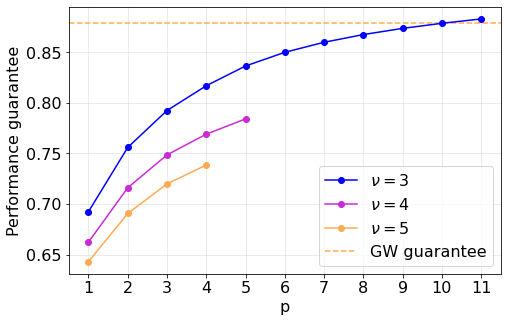

In [18]:
axsize = [6, 6/1.618]
fig = plt.figure(figsize=(axsize[0]+1.5, axsize[1]+.8))
add_sized_axis(fig, axsize)

#plt.subplots_adjust(left=0.15,right=0.85)
colors = get_colors(3)

plt.plot(np.arange(1,12), guerantees3, 'o-', label='$\\nu=3$', color=colors[0])
plt.plot(np.arange(1,6), guerantees4, 'o-', label='$\\nu=4$', color=colors[1])
plt.plot(np.arange(1,5), guerantees5, 'o-', label='$\\nu=5$', color=colors[2])

plt.gca().set_xticks(np.arange(1,12))
xlim = plt.xlim()
plt.hlines(y=0.8786, xmin=xlim[0], xmax=xlim[1], linestyle='--', color=colors[2], label='GW guarantee')
plt.xlim(*xlim)

plt.xlabel('p')
plt.ylabel('Performance guarantee')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.savefig('./pdf/ap_vs_connectivity.pdf')
plt.xlim()

---